In [1]:
import sys
sys.path.insert(0, '/home/work/Simulation/G2/G2Ana/SRKAnalysis')
import srkdata 
import srkmisc 
import srkmultiprocessing 
import srkanalysis 
import sqlite3 
import numpy as np 
from datetime import date 
import time 
import srkglobal

Welcome to JupyROOT 6.12/06


In [131]:
start_time = time.time()
today = date.today()

s = srkdata.default_srk_settings("g2")
r = srkdata.default_run_settings("g2")
srkglobal.set_computer("home_laptop")

# SRK settings and run settings
r['Title'] = 'Test'
r['SRKVersion'] = 'develop'
r['Date'] = today.strftime('%m/%d/%y')
r['RunType'] = 'ideal orbit'
r['NumTracks'] = 1
                
                
s['TimeLimit'] = 1e-5
s['RecordPeriodicSteps'] = 1
s['PeriodicStopTime'] = 1e-9
s['UseAltStepping'] = 0
s['ConstStepper'] = 0
s['InitialStepSize'] = 1e-10
s['ManualTracking'] = 1
s['RingRadius'] = 7.112
s['StorageDiameter'] = 0.09
s['RandomSeed'] = 0
s['InitialPos'] = '7.112 0 0'
#s['InitialVel'] = '0 647638.576022 299617141.695'
s['Mass'] = 1.883531594e-28
s['GyromagneticRatio'] = 0.00116592091
s['InitialMag'] = '0 0 1'
s['EPSAbs'] = 1e-15
s['EPSRel'] = 1e-11
s['B0FieldStrength'] = 1.4513
s['B0FieldDirection'] = '0 -1 0'
s['BQuadFieldStrength'] = 0.
s['EQuadFieldStrength'] = 0.
#s['EQuadFieldStrength'] = 9.6e6

#calculate velocity from momentum
p = 1.6537e-18
gamma = np.sqrt(1 + (p/(s['Mass']*299792458.))**2)
v = p/(gamma*s['Mass'])
s['InitialVel'] = '0 0 '+str(v)

In [132]:
srkdata.make_and_run(s,r)

Insert String: INSERT INTO RunLog(Title,NumTracks,SRKVersion,EPSRel,ManualTracking,Mass,RunType,Run,EPSAbs,RecordPeriodicSteps,InitialPos,UseAltStepping,InitialMag,RandomSeed,EQuadFieldStrength,PeriodicStopTime,GyromagneticRatio,InitialStepSize,TimeLimit,B0FieldDirection,Date,BQuadFieldStrength,B0FieldStrength,ConstStepper,InitialVel) Values (?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?)

Values: 
('Test', 1, 'develop', 1e-11, 1, 1.883531594e-28, 'ideal orbit', 154, 1e-15, 1, '7.112 0 0', 0, '0 0 1', 0, 0.0, 1e-09, 0.00116592091, 1e-10, 1e-05, '0 -1 0', '10/21/19', 0.0, 1.4513, 0, '0 0 299617841.647')
/home/work/Simulation/G2/G2Out/macros/RID154.mac created.

/home/work/Simulation/G2/G2Sim/Debug/G2Sim /home/work/Simulation/G2/G2Out/macros/RID154.mac > /home/work/Simulation/G2/G2Out/logs/logRID154.txt
Update String: UPDATE RunLog SET ResultsFilePath=?WHERE Run=154

Values: 
('/home/work/Simulation/G2/G2Out/results/Results_RID154.root',)


Info in <TGeoManager::TGeoManager>: Geometry theManager, SRK Simulation Geometry created
Warning in <TVector3::SetMag>: zero vector can't be stretched


In [2]:
import srkplotting as spl
import numpy as np
from scipy.optimize import curve_fit

In [3]:
def cosinus(t, A, w):
    return A*np.cos(w*t)
theo = 1.6021766208e-19*0.00116592091*1.4513/1.883531594e-28

def w_a(MdotV, time_arr):
    pars, covs = curve_fit(cosinus, time_arr, MdotV, [1, theo])
    return (pars[1], covs[1,1])

def ppb(MdotV, time_arr):
    wa = w_a(MdotV, time_arr)[0]
    return (wa-theo)*1e9/theo

In [135]:
srkglobal.set_computer("home_laptop")
srkglobal.set_graphs_dir('/home/work/Simulation/G2/G2Out/graphs/')
bid = 152

tree = spl.make_tree_to_array(bid)
time_arr = spl.make_timeline(bid)

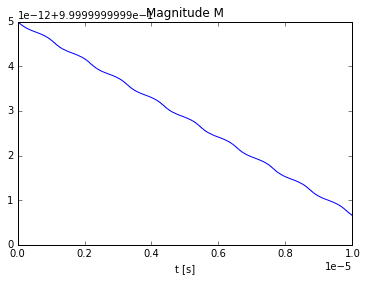

1.0


In [136]:
magM = tree[9][:-1]
spl.plot_single('Magnitude M', magM, time_arr, 'show')
print magM[1]

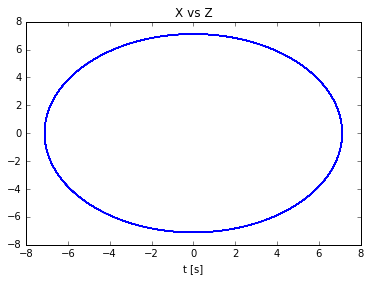

In [90]:
x = tree[0][:-1]
y = tree[1][:-1]
z = tree[2][:-1]

spl.plot_single('X vs Z', x, z, 'show')

In [91]:
MdotV = tree[10][:-1]
sim = w_a(MdotV, time_arr)
print "Simulated: ", sim[0]
print "Theoretical: ", theo
print "ppb: ", ppb(MdotV, time_arr)

Simulated:  1568384.54592
Theoretical:  1439341.23409
ppb:  89654425.7691


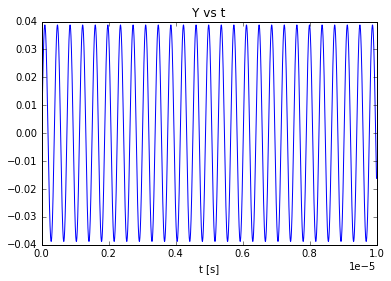

In [85]:
spl.plot_single('Y vs t', y, time_arr, 'show')

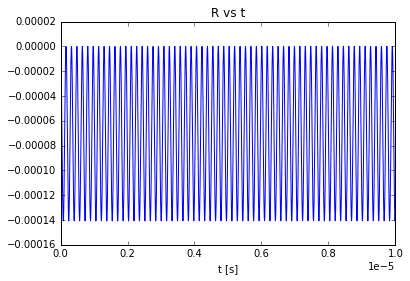

In [86]:
r = np.sqrt(x**2 + z**2) - 7.112
spl.plot_single('R vs t', r, time_arr, 'show')

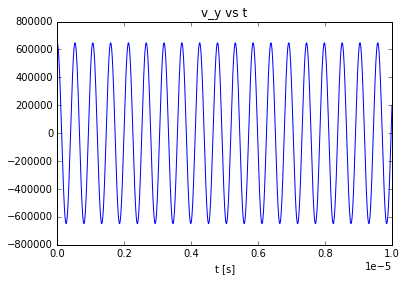

In [66]:
vx = tree[3][:-1]
vy = tree[4][:-1]
vz = tree[5][:-1]

spl.plot_single('v_y vs t', vy, time_arr, 'show')

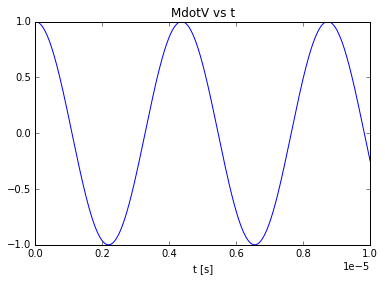

In [94]:
Mv = tree[10][:-1]

spl.plot_single('MdotV vs t', Mv, time_arr, 'show')